In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import category_encoders as ce
import xgboost as xgb
from datetime import datetime

In [2]:
train = pd.read_csv(r'C:\Users\rvuon\OneDrive\Documents\GitHub\githubtest\Data\train.csv')

In [3]:
def fillna_groupby_train(df, feature, group, agg_funct):
    df[feature] = df.groupby(group)[feature].transform(lambda x: x.fillna(x.agg(agg_funct).iloc[0]))
    return df


In [4]:
def fillna_NA(df, feature):
    df[feature] = np.where(df[feature]).isnull(), 'NA', df[feature]
    return df

In [5]:
def fillna_ZERO(df, feature):
    df[feature] = np.where(df[feature].isnull(), 0, df[feature])
    return df

In [6]:
def fillna__NA_basedon_feat_equalzero(df, depend_feat, feature):
    df[feature] = np.where((df[feature].isnull()) & (df[depend_feat]==0), 'NA', df[feature])
    return df


In [7]:
def fillna__NA_basedon_feat_greaterzero(df, depend_feat, feature):
    df[feature] = np.where((df[feature].isnull()) & (df[depend_feat]> 0), 'NA', df[feature])
    return df

In [8]:
def fillna__value_basedon_feat_greaterzero(df, depend_feat, feature, value):
    df[feature] = np.where((df[feature].isnull()) & (df[depend_feat]> 0), value, df[feature])
    return df

In [9]:
def fillna__mode(df, feature):
    df[feature] = np.where(df[feature].isnull(), df[feature].mode(), df[feature])
    return df

In [10]:
def fillna_ZERO_basedon_feat_equalzero(df, depend_feat, feature):
    df[feature] = np.where((df[feature].isnull()) & (df[depend_feat]==0), 0, df[feature])
    return df

In [11]:
def fillna_MiscFeature(df):
    df['MiscFeature'] = np.where((df['MiscFeature'].isnull()) & (df['GarageType']=='2Types'), 'Gar2', df['MiscFeature'])
    df['MiscFeature'] = np.where(df['MiscFeature'].isnull(), 'NA', df['MiscFeature'])
    return df

In [12]:
def fillna_BsmtFinType2(df):
    df['BsmtFinType2'] = np.where((df['BsmtFinType2'].isnull() & df['BsmtUnfSF'] > 0), 'Unf', df['BsmtFinType2'])
    df['BsmtFinType2'] = np.where(df['BsmtFinType2'].isnull(), 'NA', df['BsmtFinType2'])
    return df


In [13]:
def feateng_age(df, feat, newfeat):
    df[newfeat] = datetime.now().year - df[feat]
    return df

In [14]:
def feateng_ratio(df, feat1, feat2, newfeat):
    df[newfeat] = (df[feat1]/df[feat2]).round(2)
    return df

In [15]:
def feateng_has_YN(df, feat, newfeat):
    df[newfeat]= np.where(df[feat]=='Y', 1, 0)
    return df

In [16]:
def feateng_has_greaterzero(df, feat, newfeat):
    df[newfeat] = df[feat].apply(lambda x: 1 if x > 0 else 0)
    return df

In [17]:
def change_dtype(df, feat, dtype):
    df[feat] = df[feat].astype(dtype)
    return 

In [18]:
def convert_datetime(df, feat, type):
    type_mapping = {'month':'month', 'year':'year'}
    df[feat] = pd.to_datetime(df[feat]).dt.__getattribute__(type_mapping[type])
    return df


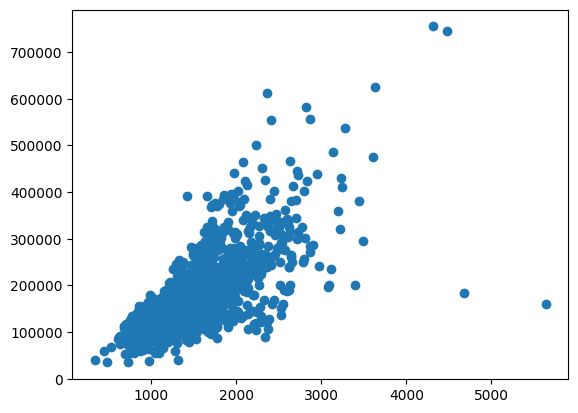

In [19]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

In [20]:
fillna_groupby_train(train, 'LotFrontage', 'Neighborhood', 'mode')

fillna_NA(train, ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'Fence'])
fillna_ZERO(train, 'MasVnrArea')


fillna__NA_basedon_feat_equalzero(train, 'TotalBsmtSF', 'BsmtExposure')
fillna__NA_basedon_feat_equalzero(train, 'Fireplaces', 'FireplaceQu')
fillna__NA_basedon_feat_equalzero(train, 'GarageCars', 'GarageType')
fillna__NA_basedon_feat_equalzero(train, 'GarageCars', 'GarageYrBlt')
fillna__NA_basedon_feat_equalzero(train, 'GarageCars', 'GarageFinish')
fillna__NA_basedon_feat_equalzero(train, 'GarageCars', 'GarageQual')
fillna__NA_basedon_feat_equalzero(train, 'GarageCars', 'GarageCond')
fillna__NA_basedon_feat_equalzero(train, 'PoolArea', 'PoolQC')

fillna__mode(train, ['Electrical', 'BsmtExposure'])

fillna_BsmtFinType2(train)
fillna_MiscFeature(train)

train.isnull().sum().sort_values(ascending=False)



Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64